# Beta -> sigmoid

A beta distribution $p_\theta(\theta) = Beta(\theta|a, b)$ is provided.

We want to find a distribution $p(z)$ where $z$ is given by
$$
    z = \log\frac{\theta}{1-\theta} \quad\quad 
$$
or
$$
    \theta = \frac{1}{1+e^{-z}} = \sigma(z)
$$

By the transformation $z=z(\theta)$, we have
$$
    p_\theta(\theta) d\theta = p_z(z) dz
$$
or
$$
    p_z(z) = p_\theta(\theta(z)) \left|\frac{d\theta}{dz}\right|
$$
Since
$$
    \frac{d\theta}{dz} = \frac{e^{-z}}{(1-e^{-z})^2} = \sigma(z) \sigma(1-z)
$$
we have 
$$
    p_z(z) = \frac{1}{B(a,b)} 
             \left(\frac{1}{1+e^{-z}}\right)^{a-1} 
             \left(\frac{e^{-z}}{1+e^{-z}}\right)^{b-1}
             \frac{e^{-z}}{(1-e^{-z})^2}
$$
or
$$
    p_z(z)  =  \frac{\theta(z)^{a-1} (1 - \theta(z))^{b-1} }{B(a,b)} \theta(z) (1 - \theta(z)) \\
      =  \frac{\theta(z)^{a} (1 - \theta(z))^{b} }{B(a,b)} 
$$

In [14]:
import scipy 
import scipy.stats as stats 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [21]:
from scipy.special import expit as sigmoid
def pdf_z(z, a, b):
    B = scipy.special.beta(a,b)
    f = sigmoid(z)**a  *  (1 - sigmoid(z))**b / B 
    return f 

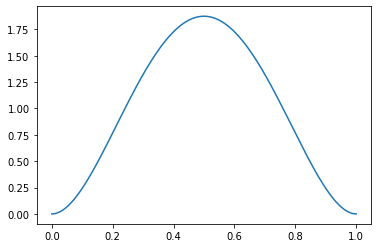

In [55]:
# beta distribution
a, b = 4, 4
eps=1e-6
theta = np.linspace(eps,1-eps, 10000)
beta = stats.beta.pdf(theta, a, b)
plt.plot(theta, beta);

In [51]:
z = np.log(theta / (1 - theta))

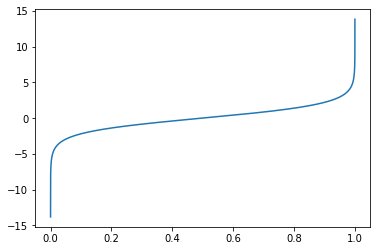

In [52]:
plt.plot(theta, z)

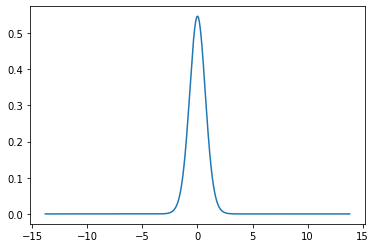

In [53]:
pz = pdf_z(z, a, b)

plt.plot(z, pz);

### Variational Inference
We can approximate this distribution with a Gaussian(m, s) by finding an optimal $m$, $s$ w.r.t $D_{KL}$.

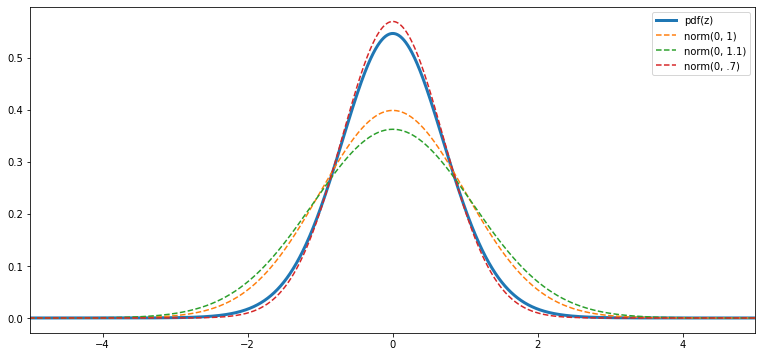

In [61]:
plt.figure(figsize=(13,6))
plt.plot(z, pz, label='pdf(z)', lw=3);
plt.plot(z, stats.norm.pdf(z, 0, 1), '--', label='norm(0, 1)');
plt.plot(z, stats.norm.pdf(z, 0, 1.1), '--', label='norm(0, 1.1)');
plt.plot(z, stats.norm.pdf(z, 0, .7), '--', label='norm(0, .7)');
plt.legend()
plt.xlim([-5,5]);

End.